파이썬 머신러닝 완벽가이드 pg.290 ~ pg.319

# 05 회귀

## 01 회귀 소개

회귀 분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭.

회귀 계수 : 독립 변수의 값에 영향을 미치는 값

머신 러닝 관점에서 보면 독립변수는 피처에 해당되며 조속변수는 결정 값이다.

머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것.

회귀는 회귀 계수의 선형/비선형 여부, 독립 변수의 개수, 종속 변수의 개수에 따라 여러 가지 유형으로 나뉜다.

- 회귀 계수
>- 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나뉜다.
>- 독립 변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.

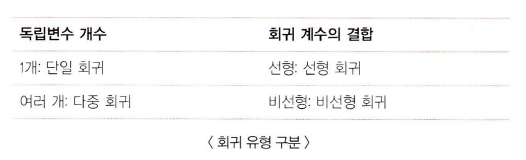

지도학습은 두가지 유형으로 나뉜다. 분류와 회귀.
- 가장 큰 차이 : 분류의 예측값은 카테고리와 같은 이산형 클래스 값이고, 회귀는 연속형 숫자 값이다.

선형회귀
- 가장 많이 쓰이는 회귀
- 실제 값과 예측값의 차이(오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화하는 방식
- 규제(Regulariztion) 방법에 따라 다시 별도의 유형으로 나뉜다.
- 규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 페널키 값을 적용하는 것.

대표적인 선형회귀 모델
- 일반 선형 회귀 : 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀계수를 최적화, 규제를 적용하지 않은 모델
- 릿지 : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델
>L2 규제 : 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위헤서 회귀 계수값을 더 작게 만드는 규제 모델
- 라쏘 : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식, L2 규제가 회귀 계수 값의 크기를 줄이는데 반해 L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 함.
- 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델
- 로지스틱 회귀 : 분류에서 ㅅ용되는 선형 모델. 분류 알고리즘

## 02 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀.

- 예측값 : $ w0+w1*X $
> 독립변수가 1개인 단순 선형 회귀에서는 이 기울기 w1과 절편 w0을 회귀 계수로 지칭한다. (interxept)
- 실제 값 : $ w0+w1*X+오류 값 $

- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델
>- 전체 데이터의 잔차(오류 값) 합기 최소가 되는 모델
>- 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다.
- 오류 값은 +나 -가 될 수 있다. 단순히 더한다면 오류 합이 줄어들 수 있다. 따라서 오류 합을 계산할 때는 절대값을 취해서 더하거나(MAE), 오류 값의 제곱을 구해서 더하는 방식(RSS)을 취한다. 일반적으로 미분 등 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구한다.
- 즉,  $  Error^2 = RSS $





 RSS는 이제 변수가 $w0, w1$인 식으로 표현할 수 있고, 이 RSS를 최소로 하는 회귀 계수( $w0, w1$ )를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항

RSS는 회귀 식의 독립변수 X, 종속 변수 Y가 중심 변수가 아니라 w 변수가 중심 변수임을 인지해야함. 독립변수와 종속변수는 RSS에서 모두 상수로 간주한다.

일반적으로 RSS는 학습 데이터의 건수로 나누어서 정규화된 식으로 표현

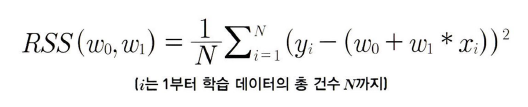

회귀에서 RSS는 비용(Cost)이고 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 한다.

머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다.

비용 함수를 손실함수(loss function)라고도 한다.

## 03 비용 최소화 하기 - 경사 하강법(Gradient Descent) 소개

w 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기가 어렵다.

경사 하강법
- 이러한 고차원 방정식에 대한 문제를 해결해주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식.
- 머신러닝의 개념(데이터를 기반으로 알고리즘이 스스로 학습한다)을 가능하게 만들어준 핵심 기법 중 하나
- '점진적으로' 반복적인 계산을 통해 $W$ 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 $W$ 파라미터를 구하는 방식

- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고  $W$ 파라미터를 지속해서 보정해 나간다.
- 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의  $W$값을 최적 파라미터로 반환

핵심 : 어떻게 하면 오류가 작아지는 방향으로  $W$ 값을 보정할 수 있을까?


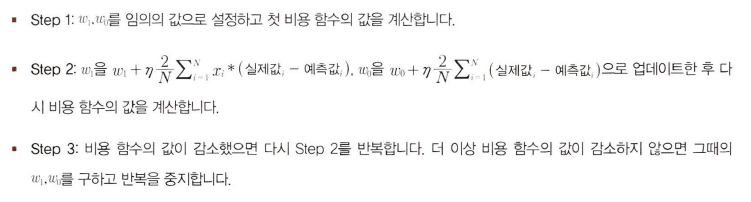

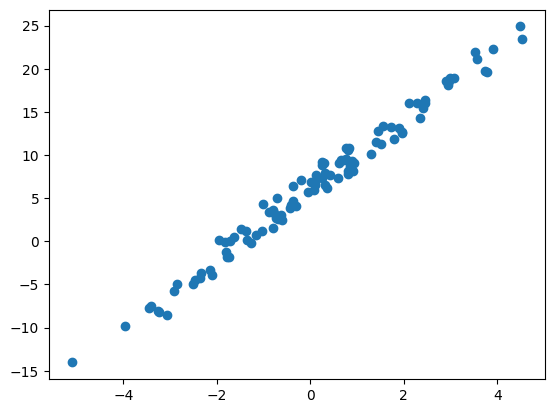

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

#y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X=2*np.random.randn(100,1)
y=6+4*X+np.random.randn(100,1)

#X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

- 데이터가 y = 4X + 6을 중심으로 무작위로 퍼져있다.

In [2]:
# 비용 함수 정의
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [3]:
# 경사 하강법

# w1과 w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N=len(y)
  #w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X, w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))
  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
# 경사 하강 방식으로 반복으로 수행하여 w1과 w0를 업데이트

# 입력 인자 inters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1, w0

In [5]:
# 최종적으로 예측값과 실제값의 RSS차이를 계산하는 함수
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

# 예측 오류 계산
w1, w0=gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.057 w0:6.075
Gradient Descent Total Cost:1.0572


- 실제 선형식과 유사하게 w1은 4.057, w0는 6.075가 나옴.
- 예측 오류 비용은 약 1.0572임.

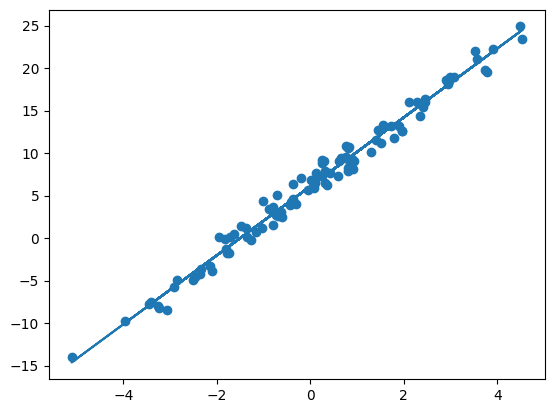

In [6]:
#y_pred에 기반해 회귀선 그리기
plt.scatter(X,y)
plt.plot(X, y_pred)

회귀 선이 잘 만들어졌음을 알 수 있다.

경사하강법은 모든 학습 데이터에 대해 반복적으로 비용 함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래걸린다.

그 때문에 실전에서는 대부분 확률적 경사 하강법을 사용.

확률적 경사 하강법
- 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장
- 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 통해 최적 비용함수 도출


In [7]:
# 확률적 경사 하강법 함수
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  return w1, w0

In [8]:
#w1, w0 및 예측 오류 비용 계산
w1, w0=stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000)
print('w1: ', round(w1[0,0], 3), 'w0:', round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.072 w0: 6.064
Stochastic Gradient Descent Total Cost:1.0582


- 예측 성능사의 차이가 없다.

피처가 여러개인 경우

- 피처가 M개 있다면 그에 따른 회귀 계수도 M + 1개로 도출

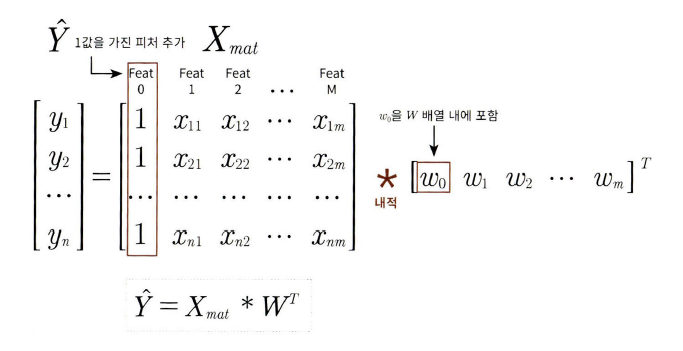

## 04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### 1) LinearRegression 클래스 - Ordinary Least Squares

- LinearRegression 클래스는 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
- LinearRegression 클래스는 fit() 메서드로, X,y 배열을 입력 받으면 회귀 계수(Coefficients)인 $W$를 coef_ 속성에 저장한다.

1. 입력 파라미터

- fit_intercept
> intercept 값을 계산할 것인지 말지를 지정, 불린 값, 디폴트는 True
- normalize
> fit_intercept가 False인 경우에는 이 파라미터가 무시된다. 만일 True인 경우엔 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.
불린 값, 디폴트는 false
2. 속성
- coef_
> fit() 메서드를 수행했을 때 회귀계수가 배열 형태로 저장하는 속성.Shape는 (target 값 개수, 피쳐 개수)
- intercept
> intercept 값

Ordinary Least square 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다.

다중공선성 : 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다.

- 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용
- PCA를 통해 차원 축소를 수행

### 2) 회귀 평가 지표

- 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심.
- 실제 값의 차이를 더하면 +와 -가 섞여서 오류가 상쇄된다.


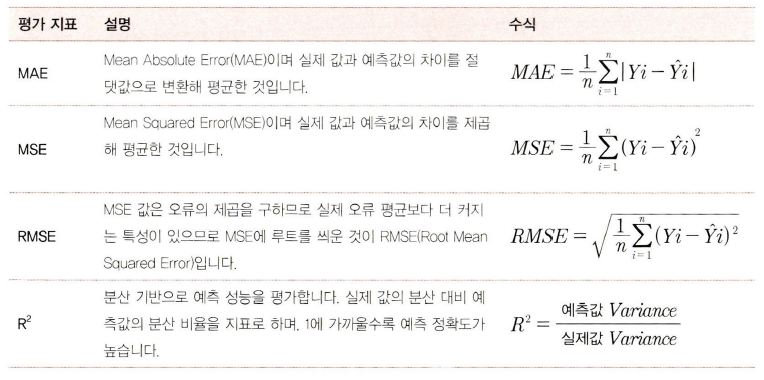

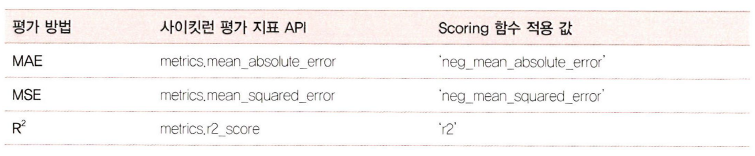

- 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가시 사용되는 scoring 파라미터의 적용값

주의

- MAE의 scoring 파라미터를 보면 neg_라는 접두어가 붙어있다. 이는 음수 값을 가진다는 의미

- 음수 값을 반환하는 이유 : 사이킷런의 Socring 함수가 socre 값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다.
- 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 보정해야한다.
- 따라서 -1을 원래의 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.

### 3) LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# from scipy import stats
# from sklearn.datasets import load_boston
# %matplotlib inline

# #boston 데이터 세트 로드
# boston = load_boston()

# #boston 데이터 세트 DataFrame 변환
# bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# #boston 데이터 세트의 target 배열은 주택 가격임, 이를 PRICE 칼럼으로 DataFrame에 추가함
# bostonDF['PRICE'] = boston.target
# print('Boston 데이터 세트 크기:', bostonDF.shape)
# bostonDF.head()

"\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport seaborn as sns\nfrom scipy import stats\nfrom sklearn.datasets import load_boston\n%matplotlib inline\n\n#boston 데이터 세트 로드\nboston = load_boston()\n\n#boston 데이터 세트 DataFrame 변환\nbostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)\n\n#boston 데이터 세트의 target 배열은 주택 가격임, 이를 PRICE 칼럼으로 DataFrame에 추가함\nbostonDF['PRICE'] = boston.target\nprint('Boston 데이터 세트 크기:', bostonDF.shape)\nbostonDF.head()\n"

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- Null 값은 없으며 모두 float형이다.

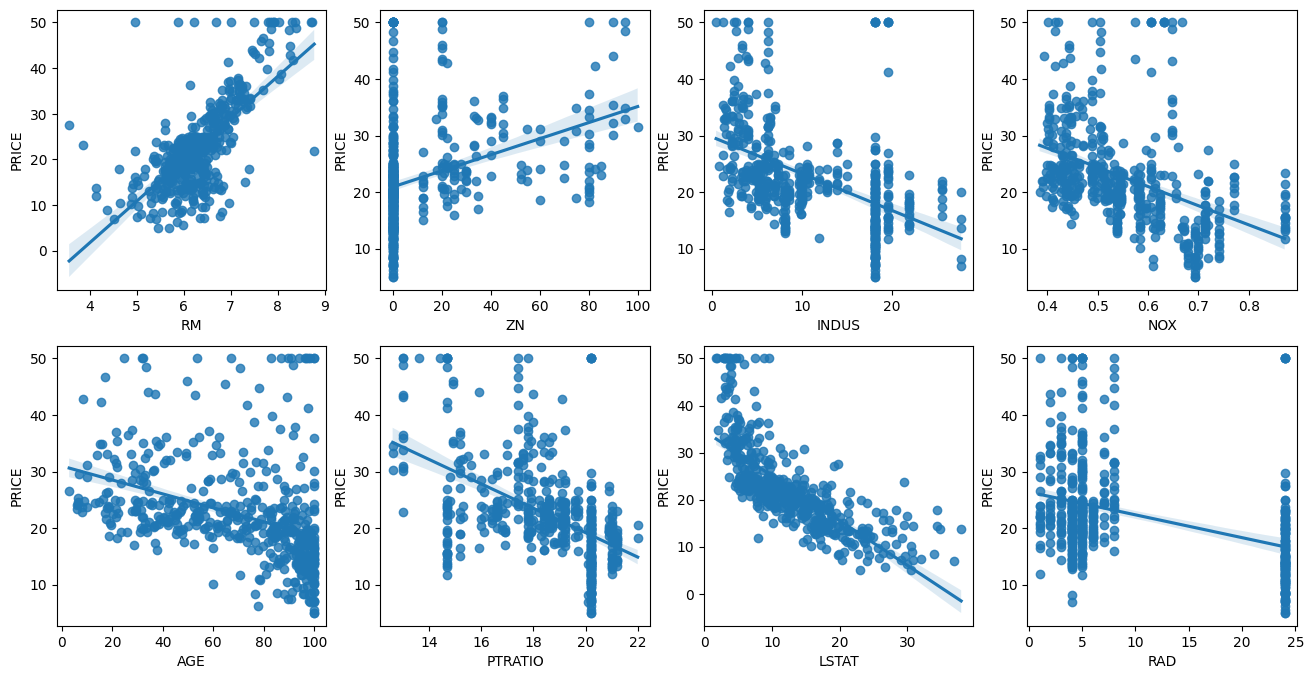

In [14]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느정도인지 시각화

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2의 ax를 가짐.
fig,axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM','ZN', 'INDUS','NOX', 'AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row =int(i/4)
  col=i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.

- RM은 양 방향의 선형성이 가장 크다. 즉 방의 크기가 클수록 가격이 증가하는 모습을 볼 수 있다.

- LSTAT은 음 방향의 선형성이 가장 크다. LSTAT이 적을수록 PRICE가 증가하는 모습이 확연히 나타난다.

In [15]:
#회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis =1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE :{1:.3F}'.format(mse,rmse))
print('Varance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE :4.159
Varance score : 0.757


In [16]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [17]:
# 피처별 회귀 계수 값 매핑, 높은 순으로 출력
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커보인다

In [19]:
# 최적화 -> 교차검증

from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

#cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores) # -1을 곱함에 유의
avg_rmse=np.mean(rmse_scores)

#cross_val_score(scoring="net_mean_squared_error")로 변환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f}',format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: {0:.3f} 5.828658946215802


- 5개 폴드 세트에 대해서 교차 검증을 수행한 결과, 평균 RMSE는 약 5.83이 나왔다.

## 05 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해

다항 회귀
- 독립 변수의 단항식이 아닌 2,3차 방정식과 같은 다항시긍로 표현되는 것
- 다항 회귀는 선형 회귀임
> 선형 회귀/ 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립 변수의 선형/비선형 여부와는 무관하다.



사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.
> - 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환
> - fit()/transform() 메스드를 통해 변환 작업 수행

In [20]:
# 단항값을 2차 다항값으로

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 단항 계수 피쳐 $[x1,x2]$를 2차 다항 계수 $[1,x1,x2,x1^2, x1x2,x2^2]$으로 변경하므로 첫번째 입력 단항 계수 피쳐 $[x1=0,x2=1]$ 은 $[1,x1=0,x1^2=0, x1x2=0, x2^2=0]$ 형태인 $[1,0,1,0,0,1]$으로 변환된다.

In [21]:
# 피처 값이 입력 -> 결정 값 반환
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [22]:
#3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

#LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


- 피처가 10개로 늘어남.

사이킷런의 Pineline 객체를 이용해 한번에 다항 회귀를 구현
- 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 더 명료한 코드 작성법

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다.

다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다.

즉. 차수가 높아질수록 과적합의 문제가 크다.

In [24]:
# 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


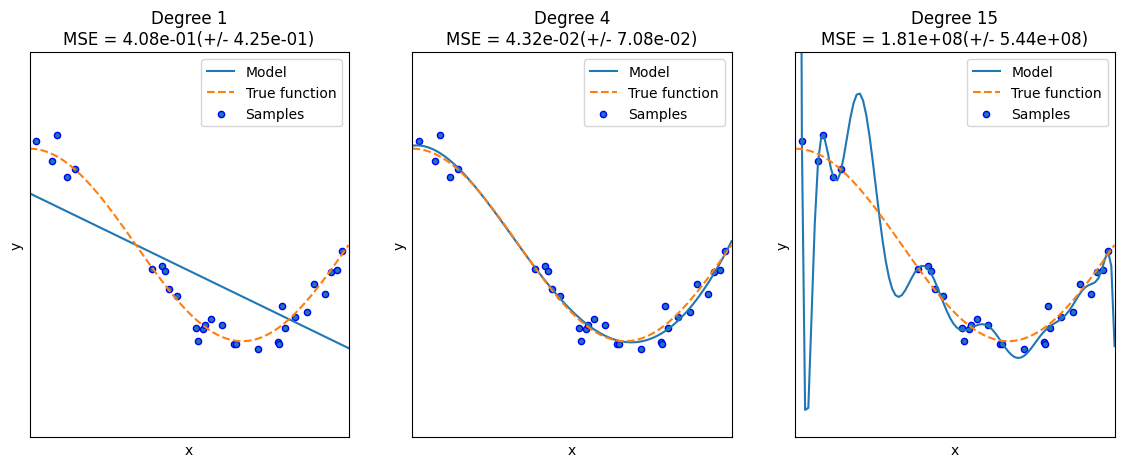

In [25]:
# 다항식의 차수를 1,4,15로 변경하며 예측 결과 비교

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 맨 왼쪽의 degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 같다. 실제 데이터 세트를 직선으로 예측하기에는 너무 단순해보인다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소 적합 모델이 되었다. MSE : 0.407
- 가운데 degree 4인 예측 곡선은 실제 데이터 세트와 유사한 모습이다. 변동하는 잡음까지는 예측하지 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다. MSE : 0.043 -> 가장 뛰어난 예측 성능을 나타낸다.
- 맨 오른쪽의 예측 곡선은 어처구니 없을 정도로 오류 값이 발생했다. 테스트 데이터 세트의 변동 잡음 값까지 지나치게 반영하여 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이 없는 수준의 높은 MSE 값이 나왔다.

좋은 예측 모델은 과소적합 모델도 아니고 과적합 모델도 아닌 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델을 의미한다.

### 편향-분산 트레이드오프(Bias-Variance Trade off)


머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나.

- 앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있다. 이러한 모델을 고편향성을 가졌따고 표현한다.
- 반대로 Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이러한 모델을 고분산성을 가졌다고 표현한다.

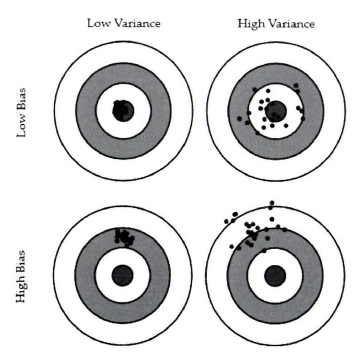

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉,  편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합).

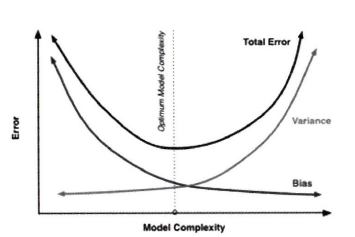

- 편향과 분산의 관계에 따른 전체 오류 값의 변화

편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.